In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## 1. Read data from file

In [4]:
df = pd.read_csv('epa-sea-level.csv', index_col=0)

In [5]:
df.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN


### 1.1 EDA

In [36]:
df.index = df.index.astype('float')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 134 entries, 1880.0 to 2013.0
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CSIRO Adjusted Sea Level  134 non-null    float64
 1   Lower Error Bound         134 non-null    float64
 2   Upper Error Bound         134 non-null    float64
 3   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4)
memory usage: 5.2 KB


In [38]:
print(f"Rango de fechas (anuales): {df.index.min()} --- {df.index.max()}")

Rango de fechas (anuales): 1880.0 --- 2013.0


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CSIRO Adjusted Sea Level,134.0,3.650341,2.485692,-0.440945,1.632874,3.312992,5.587598,9.326772
Lower Error Bound,134.0,3.204666,2.663781,-1.346457,1.078740,2.915354,5.329724,8.992126
Upper Error Bound,134.0,4.096016,2.312581,0.464567,2.240157,3.710630,5.845472,9.661417
NOAA Adjusted Sea Level,21.0,7.363746,0.691038,6.297493,6.848690,7.488353,7.907365,8.546648


## 2. Create scatter plot

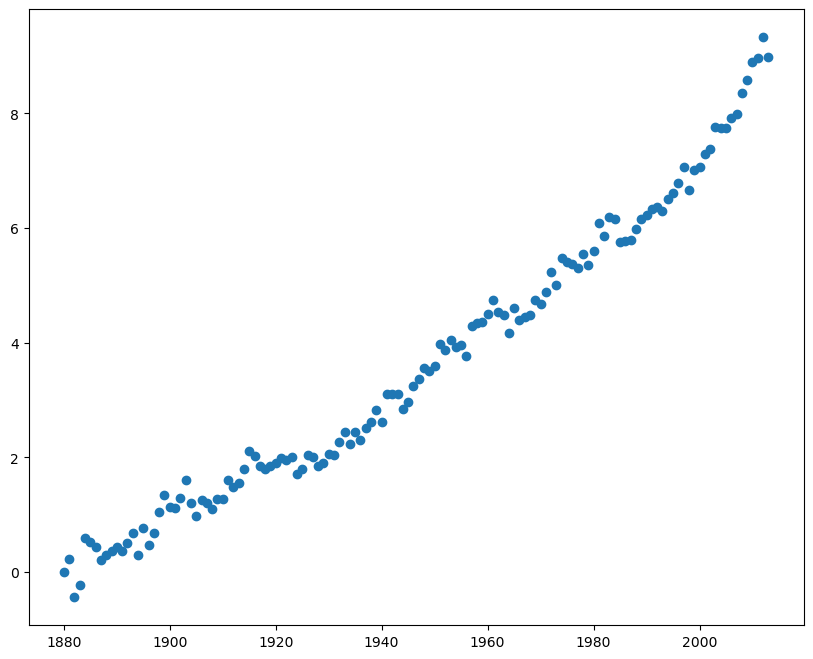

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(
    x = df.index,
    y = 'CSIRO Adjusted Sea Level',
    data = df
)

plt.show()

## 3. Create first line of best fit

In [58]:
years_1880_2050 = pd.Series([year for year in range(int(df.index.min()), 2050 + 1)], dtype='float')

In [59]:
years_1880_2050


0      1880.0
1      1881.0
2      1882.0
3      1883.0
4      1884.0
        ...  
166    2046.0
167    2047.0
168    2048.0
169    2049.0
170    2050.0
Length: 171, dtype: float64

In [61]:
slope1, intercept1, _, _, _ = linregress(
    x = df.index,
    y = df['CSIRO Adjusted Sea Level']
)

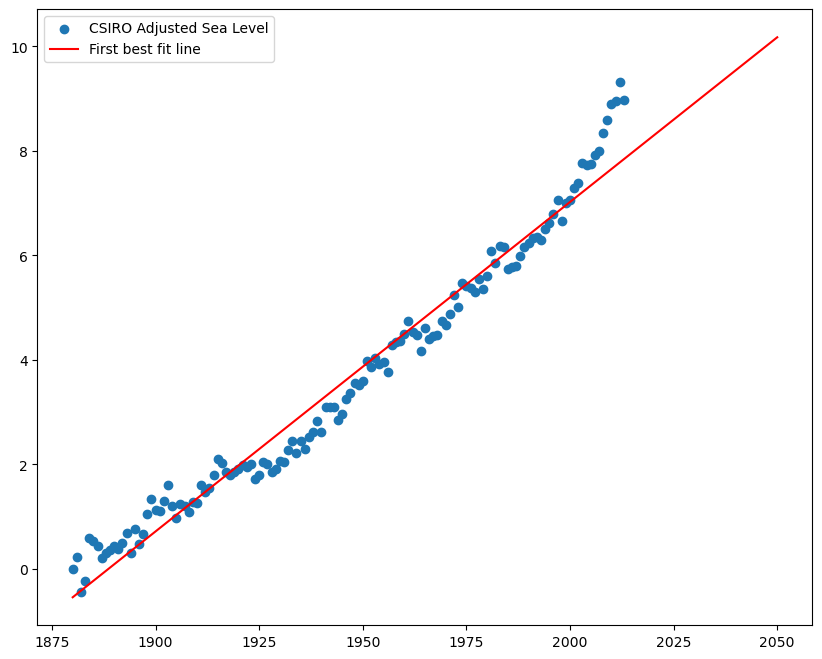

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(
    x = df.index,
    y = df['CSIRO Adjusted Sea Level'],
    label = 'CSIRO Adjusted Sea Level'
)

ax.plot(
    years_1880_2050,
    slope1 * years_1880_2050 + intercept1,
    color = 'red',
    label = 'First best fit line'
)

ax.legend()

plt.show()

## 4. Create second line of best fit

In [63]:
df_sXX = df[df.index >= 2000]

In [64]:
df_sXX

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
2000.0,7.062992,6.791339,7.334646,6.920582
2001.0,7.287402,7.019685,7.555118,7.087460
2002.0,7.381890,7.110236,7.653543,7.319698
2003.0,7.759843,7.484252,8.035433,7.488353
2004.0,7.740157,7.464567,8.015748,7.507933
2005.0,7.744094,7.472441,8.015748,7.644563
2006.0,7.917323,7.645669,8.188976,7.697420
2007.0,7.996063,7.712598,8.279528,7.702147
2008.0,8.350394,8.078740,8.622047,7.907365


In [65]:
slope2, intercept2, _, _, _ = linregress(
    x = df_sXX.index,
    y = df_sXX['CSIRO Adjusted Sea Level']
)

In [67]:
years_2000_2050 = years_1880_2050[years_1880_2050 >= 2000]

In [69]:
years_2000_2050

120    2000.0
121    2001.0
122    2002.0
123    2003.0
124    2004.0
125    2005.0
126    2006.0
127    2007.0
128    2008.0
129    2009.0
130    2010.0
131    2011.0
132    2012.0
133    2013.0
134    2014.0
135    2015.0
136    2016.0
137    2017.0
138    2018.0
139    2019.0
140    2020.0
141    2021.0
142    2022.0
143    2023.0
144    2024.0
145    2025.0
146    2026.0
147    2027.0
148    2028.0
149    2029.0
150    2030.0
151    2031.0
152    2032.0
153    2033.0
154    2034.0
155    2035.0
156    2036.0
157    2037.0
158    2038.0
159    2039.0
160    2040.0
161    2041.0
162    2042.0
163    2043.0
164    2044.0
165    2045.0
166    2046.0
167    2047.0
168    2048.0
169    2049.0
170    2050.0
dtype: float64

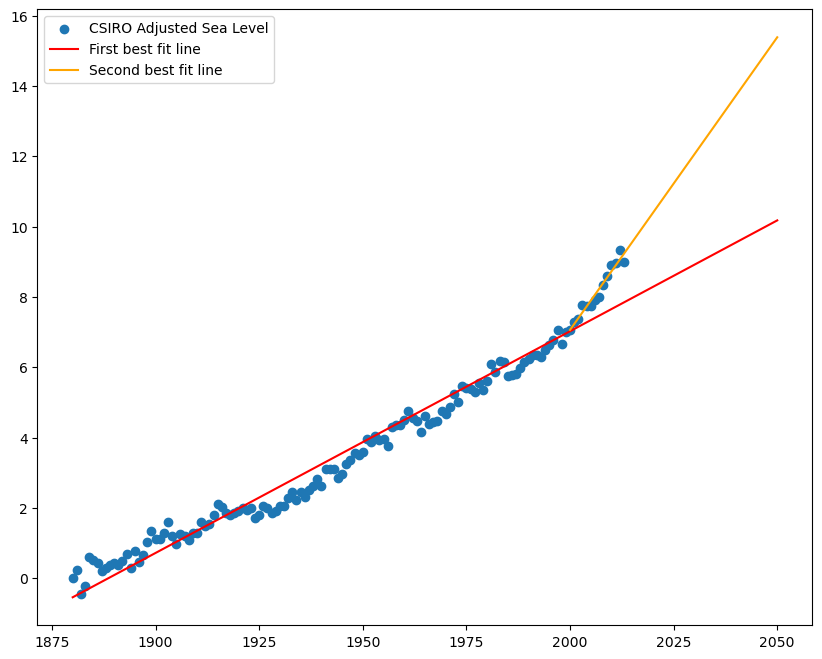

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(
    x = df.index,
    y = df['CSIRO Adjusted Sea Level'],
    label = 'CSIRO Adjusted Sea Level'
)

ax.plot(
    years_1880_2050,
    slope1 * years_1880_2050 + intercept1,
    color = 'red',
    label = 'First best fit line'
)

ax.plot(
    years_2000_2050,
    slope2 * years_2000_2050 + intercept2,
    color = 'orange',
    label = 'Second best fit line'
)

ax.legend()

plt.show()

## 5. Add labels and title

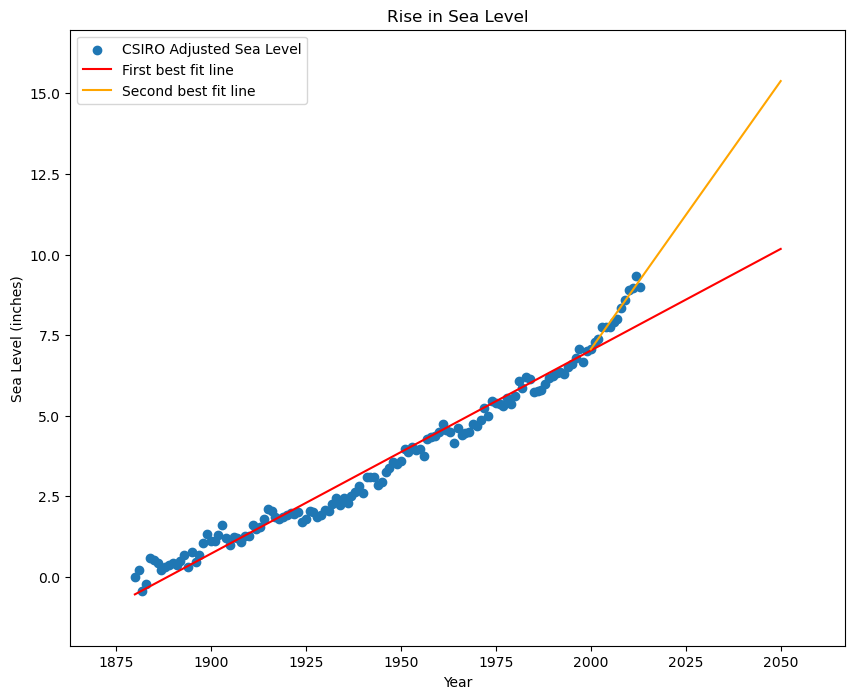

In [71]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(
    x = df.index,
    y = df['CSIRO Adjusted Sea Level'],
    label = 'CSIRO Adjusted Sea Level'
)

ax.plot(
    years_1880_2050,
    slope1 * years_1880_2050 + intercept1,
    color = 'red',
    label = 'First best fit line'
)

ax.plot(
    years_2000_2050,
    slope2 * years_2000_2050 + intercept2,
    color = 'orange',
    label = 'Second best fit line'
)

ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')

plt.margins(0.1)

ax.legend()

plt.show()

## 6. Save plot and return data for testing (NO MODIFY)

In [72]:
fig.savefig('sea_level_plot.png')